In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('cpu')
def norm(data):
    return np.array(data)/(max(data))

In [2]:
import platform
platform.platform()


'macOS-12.3-arm64-i386-64bit'

In [155]:
appa_hours = pd.read_csv("exports/appa_hr_crop_withCreated.csv")

In [156]:
appa_hours.Time = pd.to_datetime(appa_hours.Time)

In [157]:
appa_hours.columns

Index(['Time', 'ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_heatR_1', 'ZnOR_heatR_2', 'LaFeO3_heatR_1', 'LaFeO3_heatR_2',
       'WO3_heatR_1', 'WO3_heatR_2', 'ZnOR_heatV_1', 'ZnOR_heatV_2',
       'LaFeO3_heatV_1', 'LaFeO3_heatV_2', 'WO3_heatV_1', 'WO3_heatV_2',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC', 'PM10', 'NO2',
       'SO2', 'O3', 'CO', 'ZnOR_1_TimeSinceCreated', 'ZnOR_2_TimeSinceCreated',
       'LaFeO3_1_TimeSinceCreated', 'LaFeO3_2_TimeSinceCreated',
       'WO3_1_TimeSinceCreated', 'WO3_2_TimeSinceCreated'],
      dtype='object')

In [159]:
import math

appa_hours["time"] = appa_hours["Time"].dt.hour
appa_hours["month"] = appa_hours["Time"].dt.month


appa_hours["weekend"] = (
    appa_hours["Time"].dt.dayofweek >= 4
).astype("int")

appa_hours["sin_time"] = appa_hours["time"].apply(
    lambda x: math.sin(x) * 2 * (math.pi / 24)
)
appa_hours["cos_time"] = appa_hours["time"].apply(
    lambda x: math.cos(x) * 2 * (math.pi / 24)
)

appa_hours["sin_month"] = appa_hours["month"].apply(
    lambda x: math.sin(x) * 2 * (math.pi / 12)
)

appa_hours["cos_month"] = appa_hours["month"].apply(
    lambda x: math.cos(x) * 2 * (math.pi / 12)
)

In [160]:
appa_hours = appa_hours[['ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_heatR_1', 'ZnOR_heatR_2', 'LaFeO3_heatR_1', 'LaFeO3_heatR_2',
       'WO3_heatR_1', 'WO3_heatR_2', 'ZnOR_heatV_1', 'ZnOR_heatV_2',
       'LaFeO3_heatV_1', 'LaFeO3_heatV_2', 'WO3_heatV_1', 'WO3_heatV_2',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_TimeSinceCreated', 'ZnOR_2_TimeSinceCreated',
       'LaFeO3_1_TimeSinceCreated', 'LaFeO3_2_TimeSinceCreated',
       'WO3_1_TimeSinceCreated', 'WO3_2_TimeSinceCreated','time', 'month',
       'weekend', 'sin_time', 'cos_time', 'sin_month', 'cos_month', 'NO2', 'SO2', 'O3', 'CO']]

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,median_absolute_error, mean_absolute_error

In [595]:
appa_hours.columns

Index(['ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_heatR_1', 'ZnOR_heatR_2', 'LaFeO3_heatR_1', 'LaFeO3_heatR_2',
       'WO3_heatR_1', 'WO3_heatR_2', 'ZnOR_heatV_1', 'ZnOR_heatV_2',
       'LaFeO3_heatV_1', 'LaFeO3_heatV_2', 'WO3_heatV_1', 'WO3_heatV_2',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_TimeSinceCreated', 'ZnOR_2_TimeSinceCreated',
       'LaFeO3_1_TimeSinceCreated', 'LaFeO3_2_TimeSinceCreated',
       'WO3_1_TimeSinceCreated', 'WO3_2_TimeSinceCreated'],
      dtype='object')

In [161]:
cols = ['ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_heatR_1', 'ZnOR_heatR_2', 'LaFeO3_heatR_1', 'LaFeO3_heatR_2',
       'WO3_heatR_1', 'WO3_heatR_2', 'ZnOR_heatV_1', 'ZnOR_heatV_2',
       'LaFeO3_heatV_1', 'LaFeO3_heatV_2', 'WO3_heatV_1', 'WO3_heatV_2',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_TimeSinceCreated', 'ZnOR_2_TimeSinceCreated',
       'LaFeO3_1_TimeSinceCreated', 'LaFeO3_2_TimeSinceCreated',
       'WO3_1_TimeSinceCreated', 'WO3_2_TimeSinceCreated', 'time', 'month',
       'weekend', 'sin_time', 'cos_time', 'sin_month', 'cos_month']
outs = ['NO2', 'O3', 'CO']

In [162]:
vsplit = round(len(appa_hours) * 0.2)

X_train = appa_hours.iloc[vsplit:][cols]
X_test = appa_hours.iloc[:vsplit][cols]

Y_train = appa_hours.iloc[vsplit:][outs]
Y_test = appa_hours.iloc[:vsplit][outs]

In [65]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [138]:
Y_test_pred_r = model.predict(X_test)

print("Random Forest")
print(f"Median Error: {median_absolute_error(Y_test, Y_test_pred_r)} \n Mean error: {mean_absolute_error(Y_test, Y_test_pred_r)}")

Random Forest
Median Error: 6.320622991452992 
 Mean error: 8.13927195278955


# Transformers

In [19]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [11]:
appa_hours.columns

Index(['Time', 'ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_heatR_1', 'ZnOR_heatR_2', 'LaFeO3_heatR_1', 'LaFeO3_heatR_2',
       'WO3_heatR_1', 'WO3_heatR_2', 'ZnOR_heatV_1', 'ZnOR_heatV_2',
       'LaFeO3_heatV_1', 'LaFeO3_heatV_2', 'WO3_heatV_1', 'WO3_heatV_2',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC', 'PM10', 'NO2',
       'SO2', 'O3', 'CO', 'ZnOR_1_TimeSinceCreated', 'ZnOR_2_TimeSinceCreated',
       'LaFeO3_1_TimeSinceCreated', 'LaFeO3_2_TimeSinceCreated',
       'WO3_1_TimeSinceCreated', 'WO3_2_TimeSinceCreated'],
      dtype='object')

In [89]:
len(X[0])

35

In [163]:
class BasicNet(nn.Module):
    def __init__(self, in_channel):
        super(BasicNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=40, kernel_size=(4,4))

        self.conv2 = nn.Conv2d(in_channels=40, out_channels=20, kernel_size=(4, 4))

        self.conv3 = nn.Conv2d(in_channels=20, out_channels=3, kernel_size=(4, 4))

        self.fc1 = nn.Linear(1170, 200)
        self.fc2 = nn.Linear(200, 150)
        self.fc3 = nn.Linear(150, 50)
        self.fc4 = nn.Linear(50, 3)

        self.dropout1 = nn.Dropout(0.03)

        self.dropout2 = nn.Dropout(0.1)

        self.dropout3 = nn.Dropout(0.1)
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        x = self.fc1(torch.flatten(x, start_dim=1))
        x = F.relu(x)
        x = self.fc2(x)
        x = self.dropout1(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x

basic_model = BasicNet(1)
print(basic_model)

BasicNet(
  (conv1): Conv2d(1, 40, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(40, 20, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(20, 3, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=1170, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=3, bias=True)
  (dropout1): Dropout(p=0.03, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (dropout3): Dropout(p=0.1, inplace=False)
)


In [689]:
X.shape

(13678, 1, 24, 28)

In [164]:
X = appa_hours[['ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_heatR_1', 'ZnOR_heatR_2', 'LaFeO3_heatR_1', 'LaFeO3_heatR_2',
       'WO3_heatR_1', 'WO3_heatR_2', 'ZnOR_heatV_1', 'ZnOR_heatV_2',
       'LaFeO3_heatV_1', 'LaFeO3_heatV_2', 'WO3_heatV_1', 'WO3_heatV_2',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_TimeSinceCreated', 'ZnOR_2_TimeSinceCreated',
       'LaFeO3_1_TimeSinceCreated', 'LaFeO3_2_TimeSinceCreated',
       'WO3_1_TimeSinceCreated', 'WO3_2_TimeSinceCreated', 'time', 'month',
       'weekend', 'sin_time', 'cos_time', 'sin_month', 'cos_month']].to_numpy()
Y = appa_hours[['NO2', 'O3', 'CO']].to_numpy()

In [165]:
scalerX = preprocessing.StandardScaler().fit(X)
X = scalerX.transform(X)
scalerY = preprocessing.StandardScaler().fit(Y)
Y = scalerY.transform(Y)

In [166]:
X = np.lib.stride_tricks.sliding_window_view(X, (24,35))
Y = Y[X.shape[1]-1:]
(X.shape,Y.shape)

((13678, 1, 24, 35), (13701, 3))

In [167]:
data = []
for i in range(len(X)):
    data.append([X[i], Y[i]])

In [168]:
vsplit = round(len(data) * 0.2)

train_dl = DataLoader(data[vsplit:], batch_size=15, shuffle=True)
test_dl = DataLoader(data[:vsplit], batch_size=15, shuffle=True)

In [169]:
loss_hist = []
loss_val_hist = []
models = []
def train_model(train_dl, model, epochs):
    global bm, loss_hist, loss_val_hist
    model.to(device)

    best_loss = float("inf")
    # define the optimization
    criterion = nn.L1Loss()
    optimizer = torch.optim.SGD(basic_model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(epochs):
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model ou
            yhat = model(inputs.float().to(device))
            loss = criterion(yhat, targets.float().to(device))
            # credit assignment
            optimizer.zero_grad()
            loss.backward()
            # update model weights
            optimizer.step()
            
        loss_hist.append(loss.detach().cpu().numpy().item())
        val_loss = evaluate_model(test_dl, model)[0]
        loss_val_hist.append(val_loss)
        if best_loss > loss:
            models.append([loss, val_loss, copy.deepcopy(model)])
        print(f"epoch {epoch} done, loss {loss} loss val {loss_val_hist[-1]}")

In [107]:
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs.float())
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    # calculate accuracy
    acc = (actuals, predictions)
    return mean_absolute_error(actuals, predictions), (predictions, actuals)

In [40]:
import copy

In [170]:
train_model(train_dl, basic_model, 200)

epoch 0 done, loss 0.29924261569976807 loss val 0.8938072227935882
epoch 1 done, loss 0.38683319091796875 loss val 0.8376559062373347
epoch 2 done, loss 0.5346595048904419 loss val 0.7140995123201113
epoch 3 done, loss 0.12386731058359146 loss val 0.7232434289603756
epoch 4 done, loss 0.19551165401935577 loss val 0.7877668004058505
epoch 5 done, loss 0.14930908381938934 loss val 0.8109596228138494
epoch 6 done, loss 0.21536871790885925 loss val 0.7375225328273
epoch 7 done, loss 0.337555468082428 loss val 0.7782694313670359
epoch 8 done, loss 0.16598914563655853 loss val 0.7580844016620012
epoch 9 done, loss 0.3032310903072357 loss val 0.7260048801636371
epoch 10 done, loss 0.14999589323997498 loss val 0.7405578701542171
epoch 11 done, loss 0.16136357188224792 loss val 0.7756658630787632
epoch 12 done, loss 0.15870331227779388 loss val 0.8065899077194651
epoch 13 done, loss 0.16079047322273254 loss val 0.8693717658720885
epoch 14 done, loss 0.2601684629917145 loss val 0.849439395472433

In [728]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
evals = evaluate_model(test_dl, basic_model)[1]
evals[1]

array([[-0.54618671,  1.06808293, -0.41565641],
       [ 0.68755297, -0.16362373,  0.05611054],
       [-1.16305655,  1.1450646 , -1.10662821],
       ...,
       [-0.93874025,  1.42733071, -0.71587175],
       [ 1.08010651, -1.26702762,  2.34346545],
       [ 3.26719049, -1.26702762,  4.36872761]])

In [770]:
len(loss_hist[-79:])

79

In [54]:
import math

array([[42.028819  , 86.78986643,  0.91610095]])

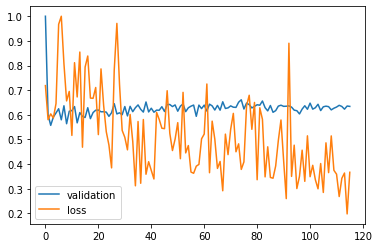

In [122]:
plt.plot(norm(loss_val_hist), label="validation")
plt.plot(norm(loss_hist), label="loss")
plt.legend()
plt.show()

In [137]:
evals = evaluate_model(test_dl, max(models, key=lambda x:x[1])[2])[1]
mean_absolute_error(scalerY.inverse_transform(evals[1]), scalerY.inverse_transform(evals[0]))

14.561535587485539